https://www.kaggle.com/c/house-prices-advanced-regression-techniques

I am using random forest to predict proce of o house.



**IMPORTING DATASETS**

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv')
###test = pd.read_csv('test.csv')  - I am not using it- as it does not contain 'SalePrice' information
#print(df.head())

X=df.drop(['SalePrice','Id'],axis=1)
y=df.loc[:,'SalePrice']

**INITIAL DATA PREPARATION**

In [3]:
#checking data types
print("DATA TYPES\n\n",df.dtypes)

opisowe=df.describe()
print("\n\nDESCRIPTIVE STATISTICS\n\n",opisowe)

#checking for missing values in columns
missing=df.isnull().sum().sort_values(ascending=False)
missing_percent=missing/df.shape[0]
print("\n\n% OF MISSIN VALUES (SORTED)\n\n", missing_percent)

DATA TYPES

 Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


DESCRIPTIVE STATISTICS

                 Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  21524

In predictors PoolQC, MiscFeature, Alley,Fence,FireplaceQu - missing values mean that the feature is not present (i.e. there is no basement) so I decided to leave predictors even with many missing values in the dataset and change NaN to some numeric value.


Many predictors are categorical or nominal - so I am changing their labels to numeric

In [3]:
from sklearn.preprocessing import LabelEncoder

def my_encoding(x):
    le = LabelEncoder()
    for i in range(x.shape[1]):        
        if (x.iloc[:,i].dtypes.name=='object'):
            x.iloc[:,i][pd.isnull(x.iloc[:,i])]  = 'NaN'
            x.iloc[:, i]=le.fit_transform(x.iloc[:, i])
    return(x)

X = my_encoding(X)
#X_test = my_encoding(X_test)

#print(X_train.head())


<ipython-input-3-defea457b854>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.iloc[:,i][pd.isnull(x.iloc[:,i])]  = 'NaN'


I am standardizing the rest of predictors

In [4]:
from sklearn import preprocessing

def my_standardization(x):
    for i in range(x.shape[1]):        
        if (x.iloc[:,i].dtypes.name=='float64' or x.iloc[:,i].dtypes.name=='int64'):            
            x.iloc[:, i]=preprocessing.scale(x.iloc[:, i])
    return(x)


X=my_standardization(X)
print(X.head())


   MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0    0.073375         3    -0.208034 -0.207142       1      1         3   
1   -0.872563         3     0.409895 -0.091886       1      1         3   
2    0.073375         3    -0.084449  0.073480       1      1         0   
3    0.309859         3    -0.414011 -0.096897       1      1         0   
4    0.073375         3     0.574676  0.375148       1      1         0   

   LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
0            3          0          4  ...    -0.270208 -0.068692       3   
1            3          0          2  ...    -0.270208 -0.068692       3   
2            3          0          4  ...    -0.270208 -0.068692       3   
3            3          0          0  ...    -0.270208 -0.068692       3   
4            3          0          2  ...    -0.270208 -0.068692       3   

   Fence  MiscFeature   MiscVal    MoSold    YrSold  SaleType  SaleCondition  
0      4     

Because the testing dataset does not contain prices (and I am not submitting the kaeggle project), 
I decided to split the initial training dataset into training (80%) and testin (20%) subsets. 

In [5]:
from sklearn.model_selection import train_test_split


#X=df.drop(['SalePrice','Id'],axis=1)
#y=df.loc[:,'SalePrice']
#print(X.head())
#print(y.head())

features0=X.columns
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print("X_train.shape",X_train.shape)
print("y_train.shape",y_train.shape)
print("X_test.shape",X_test.shape)
print("y_test.shape",y_test.shape)


X_train.shape (1168, 79)
y_train.shape (1168,)
X_test.shape (292, 79)
y_test.shape (292,)


**FIRST MODEL**

using all  possible predictors and default model settings

In [6]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

X_train= np.nan_to_num(X_train) 
y_train=y_train
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)

#checking R square
Rsq1 = model1.score(X_train,y_train)
print("R-squared model1 (training):", Rsq1)


R-squared model1 (training): 0.980546824463424


checking the importance of predictors

In [7]:
importance = pd.DataFrame({'feature':features0,'importance':np.round(model1.feature_importances_,3)})
importance = importance.sort_values('importance',ascending=False).set_index('feature')
print(importance)

              importance
feature                 
OverallQual        0.599
GrLivArea          0.099
TotalBsmtSF        0.040
2ndFlrSF           0.037
BsmtFinSF1         0.031
...                  ...
BsmtFinType2       0.000
BsmtFinSF2         0.000
Heating            0.000
BsmtHalfBath       0.000
BldgType           0.000

[79 rows x 1 columns]


In [49]:
#selecting only features with importance greater than 0,01
features2=importance.loc[importance['importance']>0.01]
print(features2) 

             importance
feature                
OverallQual       0.599
GrLivArea         0.099
TotalBsmtSF       0.040
2ndFlrSF          0.037
BsmtFinSF1        0.031
1stFlrSF          0.021
GarageArea        0.016
LotArea           0.015
BsmtQual          0.012


**SECOND MODEL**
leaving only important features (from previous step)

In [14]:
#selecting only new features
features0=list(features0)
features2=list(features2.index)

N=[]#indices of new features
for i in features2:
    N.append(features0.index(i))

X_train2=X_train[:,N]
y_train2=y_train

model2 = RandomForestRegressor()
model2.fit(X_train2, y_train2)

#checking R square
Rsq2 = model2.score(X_train2,y_train2)
print("R-squared model2 (training):", Rsq2)


R-squared model1 (training): 0.9789264024660347


**CHECKING MODEL 2 ON TESTING DATASET**

In [17]:
X_test2=X_test.values[:,N]
y_test2=y_test
Rsq = model2.score(X_test2,y_test2)
print("R-squared model2 (testing):", Rsq)


R-squared model2 (testing): 0.8210902762990135


In [21]:
#RMSE and MSE
from sklearn.metrics import mean_squared_error

y2_pred = model2.predict(X_test2)
mse_model2 = mean_squared_error(y_test2, y2_pred)
print("MSE: ", mse_model2)
print("RMSE: ", mse_model2*(1/2.0))

MSE:  1209669362.9432888
RMSE:  604834681.4716444


In [23]:
#NORMALIZED RMSE and MSE
a=(y_test2-np.mean(y_test2))/np.std(y_test2)
b=(y2_pred-np.mean(y2_pred))/np.std(y2_pred)

mse_model2 = mean_squared_error(a, b)
print("MSE - normalized: ", mse_model2)
print("RMSE - normalized: ", mse_model2*(1/2.0))


MSE:  0.18331439275571318
RMSE:  0.09165719637785659


**TUNUNG MODEL HYPERPARAMETERS - RANDOMIZED SEARCH (ON TRAINING DATASET)**

In [30]:
print(model2.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# creating parameter distribution
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, X_train2.shape[1]),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "n_estimators": sp_randint(100, 500)}

random_search = RandomizedSearchCV(model2, param_distributions=param_dist,
                                   n_iter=10, cv=5, random_state=42)
random_search.fit(X_train2, y_train2)
                  
print(random_search.best_params_)

#{'bootstrap': False, 'max_depth': None, 'max_features': 4, 'min_samples_split': 7, 'n_estimators': 485}


#    n_estimators = number of trees in the foreset
#    max_features = max number of features considered for splitting a node
#    max_depth = max number of levels in each decision tree
#    min_samples_split = min number of data points placed in a node before the node is split
#    min_samples_leaf = min number of data points allowed in a leaf node
#    bootstrap = method for sampling data points (with or without replacement)


{'bootstrap': False, 'max_depth': None, 'max_features': 3, 'min_samples_split': 7, 'n_estimators': 408}


**TUNED MODEL - PERFORMANCE ON TESTING DATASET**

In [44]:
from sklearn.metrics import explained_variance_score

#checking model with best parameters
y_preds = random_search.predict(X_test2)
print("R-squared model2 (TEST DATA):", explained_variance_score(y_test2, y_preds))


#NORMALIZED RMSE and MSE
a=(y_test2-np.mean(y_test2))/np.std(y_test2)
b=(y_preds-np.mean(y_preds))/np.std(y_preds)

mse_model2 = mean_squared_error(a, b)
print("MSE - normalized: ", mse_model2)
print("RMSE - normalized: ", mse_model2*(1/2.0))



R-squared model2 (TEST DATA): 0.8430690310360147
MSE - normalized:  0.15722096195776158
RMSE - normalized:  0.07861048097888079


**PLOT SHOWING PREDICTIONS**

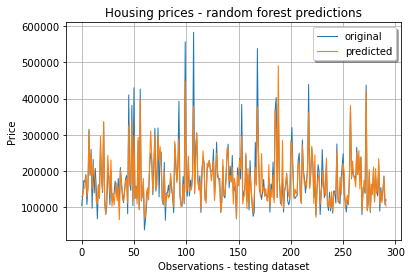

In [51]:
import matplotlib.pyplot as plt

x_ax = range(len(y_test2))
plt.plot(x_ax, y_test2, linewidth=1, label="original")
plt.plot(x_ax, y_preds, linewidth=1.1, label="predicted")
plt.title("Housing prices - random forest predictions")
plt.xlabel('Observations - testing dataset')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()